# Figure 1: Denmark Strait freshwater transports

This notebook will reproduce Figure 1 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in DATA_DIR, defined in inputs.py) to run - please see the README for details.

Image 'jgrc24213-fig-0001-m.jpg' is figure 1 from Tesdal & Haine 2020 doi.org/10.1029/2020JC016435

Denmark_Strait_full_depth_transports.nc was generated by running denmark_strait_transports.py in directory 'code'

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from inputs import DATA_DIR

In [3]:
fd_trans=xr.open_dataset(f'{DATA_DIR}/Denmark_Strait_full_depth_transports.nc')

In [4]:
img = np.asarray(Image.open('../other_data/jgrc24213-fig-0001-m.jpg'))
img.shape

(2200, 2128, 3)

In [5]:
fd_mean=fd_trans.mean(dim='time')
fd_sd=fd_trans.std(dim='time')
fd_trans_anom= fd_trans.groupby(fd_trans.time.dt.month)- fd_trans.groupby(fd_trans.time.dt.month).mean(dim="time").compute()

/tmp/ipykernel_1942137/1255100221.py:60: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


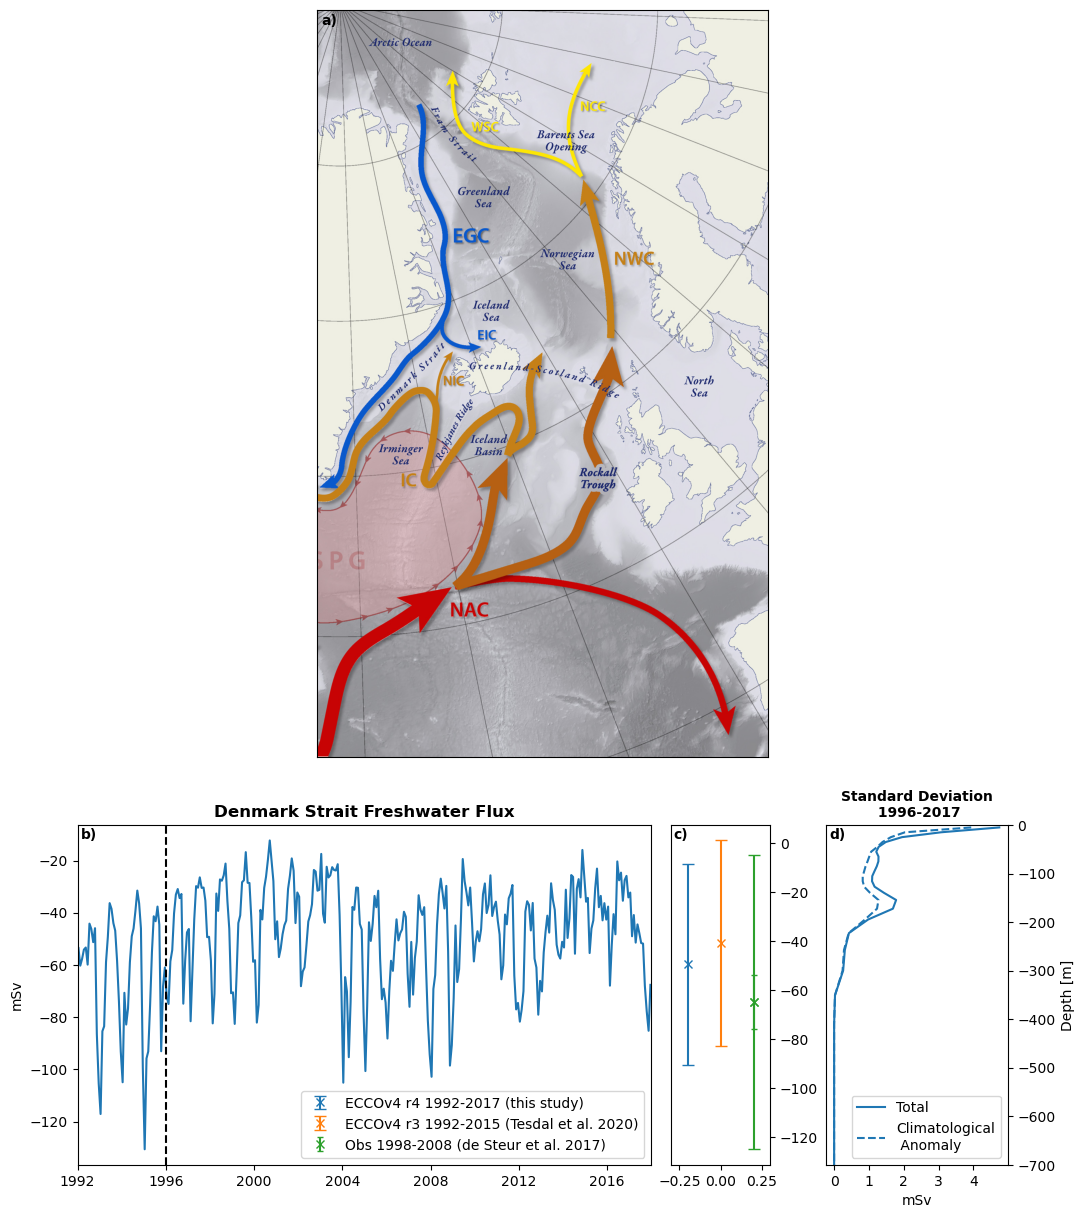

In [52]:
obs=[-65,11,60] # de Steur 2017
ecco_r3=[-41,42] # Tesdel et al. 2020
var='fw_trsp_adv'
varz='fw_trsp_adv_z'
timeslice=slice(np.datetime64('1992-01-01'),np.datetime64('2018-01-01'))

fig, axs = plt.subplot_mosaic('''
                              CCCCCCCC
                              CCCCCCCC
                              AAAAABDD
                              ''',
                             # layout='constrained',
                              sharey=False,figsize=[12,15])

ax=axs['C']
imgplot = ax.imshow(img[:,800:,:],)
ax.set_xticks([])
ax.set_yticks([])
plt.text(0.01,0.98,'a)',fontsize=10,fontweight='bold',transform=ax.transAxes)

ax=axs['A']
(1e3*fd_trans[var]).sel(Sref=34.8).plot(x='time',ax=ax)
ax.axvline(np.datetime64('1996-01-01'),color='k',ls='--')
ax.set_xlim([np.datetime64('1992-01-01'),np.datetime64('2018-01-01')])
ax.set_ylabel('mSv')
ax.set_xlabel('')
ax.set_title('Denmark Strait Freshwater Flux',fontweight='bold',fontsize=12)
plt.text(0.005,0.96,'b)',fontsize=10,fontweight='bold',transform=ax.transAxes)
plt.ylim([-140,10])

ax=axs['B']
p1a=ax.errorbar(-0.2,(fd_mean[var].sel(Sref=34.8)*1e3),yerr=2e3*fd_sd[var].sel(Sref=34.8),marker='x',ls='',capsize=4)
p2=ax.errorbar(0,ecco_r3[0],yerr=ecco_r3[1],marker='x',ls='',capsize=4)
p3=ax.errorbar(0.2,obs[0],yerr=obs[1],marker='x',ls='',capsize=2)
p4=ax.errorbar(0.2,obs[0],yerr=obs[2],marker='x',ls='',capsize=4,color=p3.lines[0].get_color())
ax.set_xlim([-0.3,0.3])
plt.xticks(None)
plt.xticks([], [])
ax.yaxis.tick_right()
ax.yaxis.set_tick_params(labelright=True)
plt.text(0.02,0.96,'c)',fontsize=10,fontweight='bold',transform=ax.transAxes)
plt.ylim([-140,10])

ax=axs['D']
pp1=(fd_trans[varz]*1e3).sel(Sref=34.8,time=timeslice).std('time').plot(y='Z',ax=ax)[0]
pp2=(fd_trans_anom[varz]*1e3).sel(Sref=34.8,time=timeslice).std('time').plot(y='Z',ax=ax,color=pp1.get_color(),ls='--')
plt.ylim([-700,0])
plt.legend(['Total',f'Climatological\n Anomaly'])
plt.ylabel('Depth [m]')
plt.xlabel('mSv')
plt.xticks([0,1,2,3,4],[0,1,2,3,4])
plt.title(f'Standard Deviation\n 1996-2017',fontweight='bold',fontsize=10)
plt.text(0.02,0.96,'d)',fontsize=10,fontweight='bold',transform=ax.transAxes)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
bbx=ax.get_position()
ax.set_position([bbx.bounds[0]+0.03,bbx.bounds[1],bbx.width-0.03,bbx.height])

axs['A'].legend([p1a,p2,p3],['ECCOv4 r4 1992-2017 (this study)','ECCOv4 r3 1992-2015 (Tesdal et al. 2020)','Obs 1998-2008 (de Steur et al. 2017)'],loc='lower right')
plt.tight_layout()

plt.savefig('../plots/fig1_DS_fwtransports.pdf')